## Exploration & Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datassist import explore
from datassist import graph

In [2]:
df_titanic = pd.read_csv('data/train.csv')

In [3]:
df_titanic = df_titanic.set_index('PassengerId')
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.shape

(891, 11)

In [5]:
explore.overview(df_titanic)

,NULL Count,NULL %,Unique Items,Type
Survived,0,0.0,2,int64
Pclass,0,0.0,3,int64
Name,0,0.0,891,object
Sex,0,0.0,2,object
Age,177,19.9,88,float64
SibSp,0,0.0,7,int64
Parch,0,0.0,7,int64
Ticket,0,0.0,681,object
Fare,0,0.0,248,float64
Cabin,687,77.1,147,object


In [6]:
explore.basic_stats(df_titanic)

,Pclass,Age,SibSp,Parch,Fare
count,891.0,714.0,891.0,891.0,891.0
mean,2.3,29.7,0.5,0.4,32.2
std,0.8,14.5,1.1,0.8,49.7
min,1.0,0.4,0.0,0.0,0.0
25%,2.0,20.1,0.0,0.0,7.9
50%,3.0,28.0,0.0,0.0,14.5
75%,3.0,38.0,1.0,0.0,31.0
max,3.0,80.0,8.0,6.0,512.3
median,3.0,28.0,0.0,0.0,14.5
mode,3.0,24.0,0.0,0.0,8.0


In [7]:
explore.count_outliers(df_titanic)

,index,Number of Outliers
0,Survived,0
1,Pclass,0
2,Age,2
3,SibSp,30
4,Parch,15
5,Fare,20


Some outliers in age, SibSp, ParCh and Fare to look out for in graphs below

<Axes: xlabel='Age', ylabel='Count'>

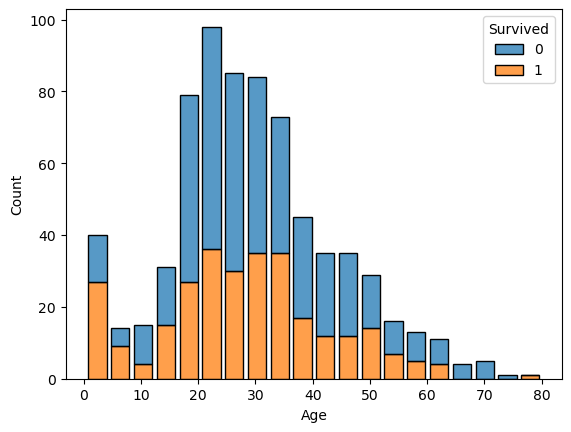

In [8]:
graph.plot_histogram_by_category(df_titanic, 'Age', 'Survived')

<Axes: xlabel='Fare', ylabel='Count'>

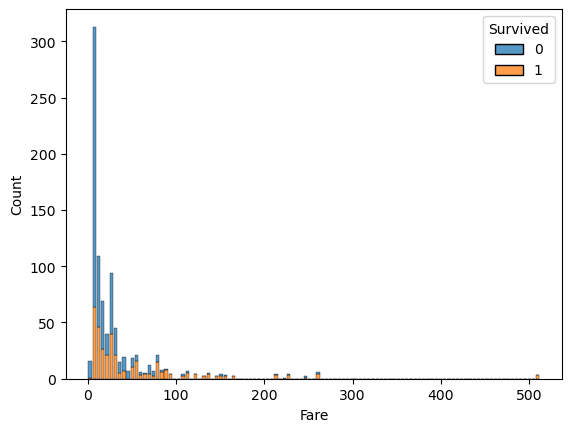

In [9]:
graph.plot_histogram_by_category(df_titanic, 'Fare', 'Survived')

The data here are highly skewed towards the lower end of the range. The mode is £8 which is likely within the tallest bin.

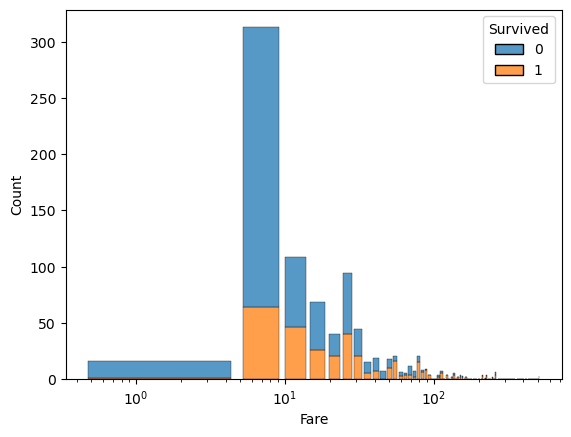

In [10]:
graph.plot_histogram_by_category(
    df_titanic, 'Fare', 'Survived'
).set_xscale('log')

Plotting the Fare again but with a logarithmic scale shows that most of the tickets are in the £5-£9 range

<Axes: title={'center': 'Survivors by Number of Siblings/ Spouses Aboard'}, xlabel='SibSp', ylabel='Count'>

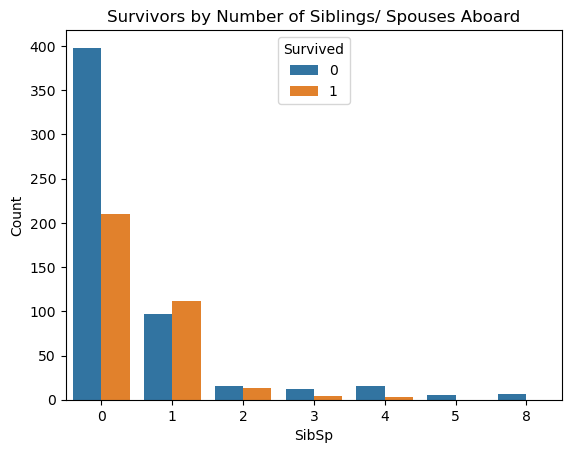

In [11]:
graph.plot_bar_by_category(
    df_titanic, 'SibSp', 'Survived',
    'Survivors by Number of Siblings/ Spouses Aboard'
)

<Axes: title={'center': 'Survivors by Ticket Class'}, xlabel='Pclass', ylabel='Count'>

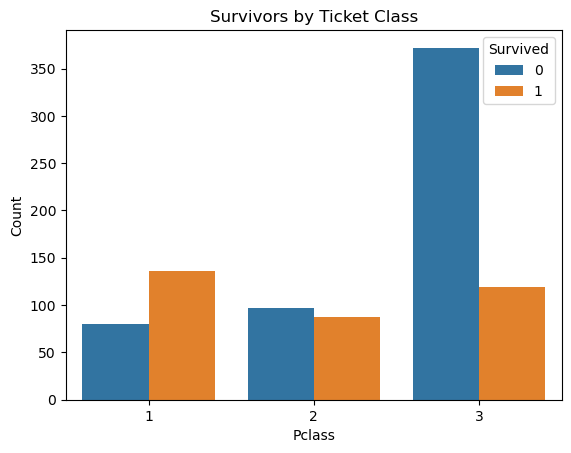

In [12]:
graph.plot_bar_by_category(
    df_titanic, 'Pclass', 'Survived', 'Survivors by Ticket Class'
)

Most of the tickets appear to be 3<sup>rd</sup> class. Within this group about 3x the number of people died compared to survived. The overwhelming majority of deaths are 3<sup>rd</sup> class ticket holders.

This may be due to the fact that they were housed below the waterline, many did not speak English so may not have understood warnings to abandon ship and preferential treatment was likely given to the 1<sup>st</sup> and 2<sup>nd</sup> class passengers.

<Axes: title={'center': 'Survivors by Number of Parents / Children Aboard'}, xlabel='Parch', ylabel='Count'>

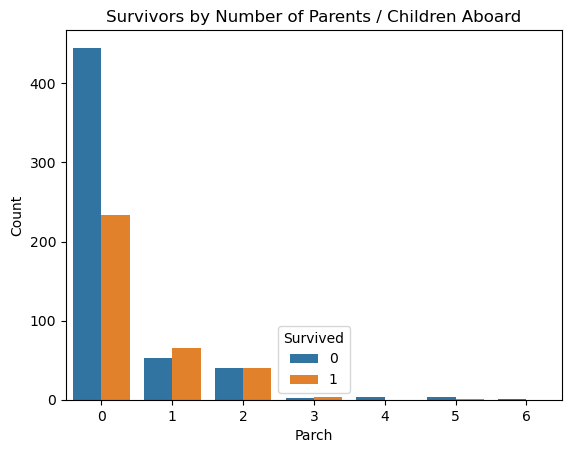

In [13]:
graph.plot_bar_by_category(
    df_titanic, 'Parch', 'Survived',
    'Survivors by Number of Parents / Children Aboard'
)

The number of people from each category decreases as the ParCh value increases. Those with no parents or children aboard are twice as likely to die as survive. This is proportionally greater than any other class, each of which seems to have about a 50/50 chance of survival.

This makes sense assuming women and children were allowed onto lifeboats first.

<Axes: title={'center': 'Survivors by Sex'}, xlabel='Sex', ylabel='Count'>

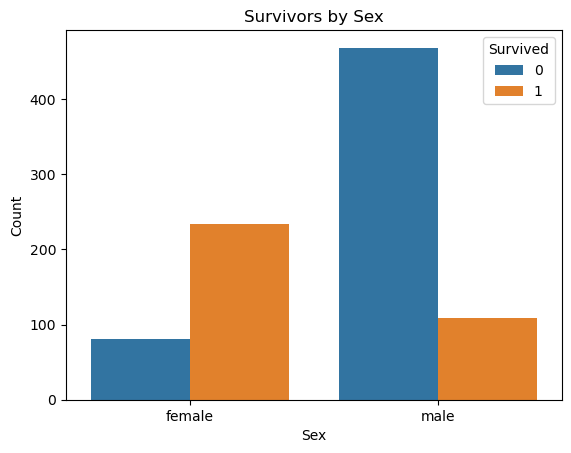

In [14]:
graph.plot_bar_by_category(
    df_titanic, 'Sex', 'Survived', 'Survivors by Sex'
)

A higher proportion of women survived than men.

[[Text(0, 0, 'Cherbourg'),
  Text(1, 0, 'Queenstown'),
  Text(2, 0, 'Southampton')]]

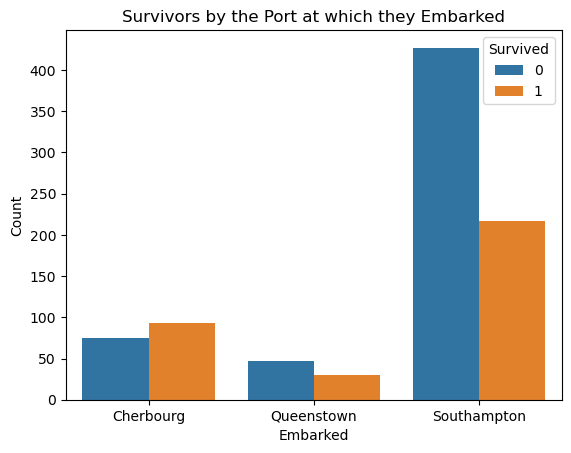

In [15]:
# C = Cherbourg, Q = Queenstown, S = Southampton
graph.plot_bar_by_category(
    df_titanic, 'Embarked', 'Survived',
    'Survivors by the Port at which they Embarked'
).set(xticklabels=['Cherbourg', 'Queenstown', 'Southampton'])


Someone was more likely to survive if they embarked at Southampton or Queenstown.

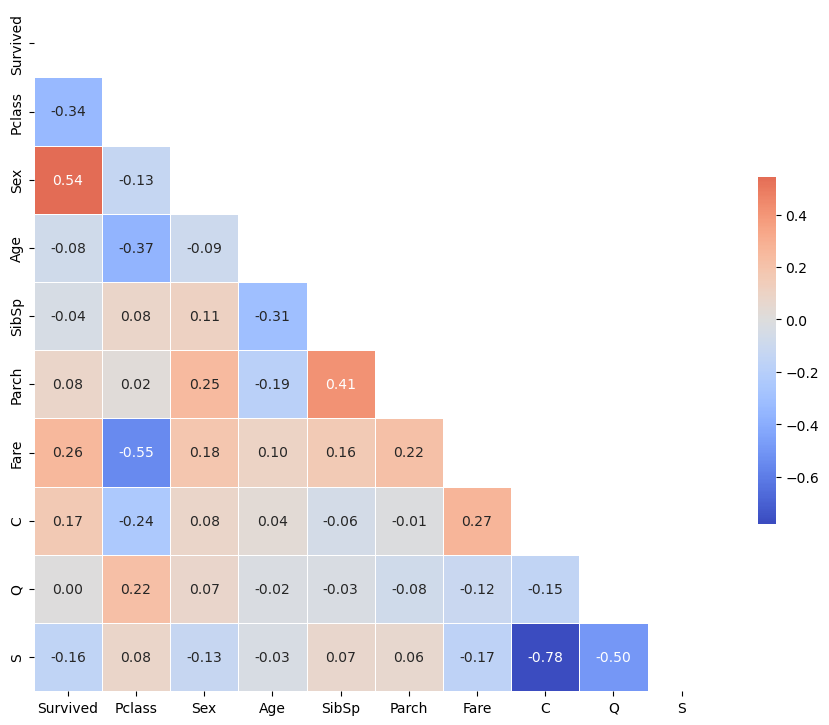

In [16]:
# Add check to make sure 'Sex' is only converted once, 
# and that `ohe` is not concatenated to `df_titanic`
# each time the cell is run.
if not any((
    df_titanic['Sex'].dtype == np.int64,
    'C' in df_titanic.columns,
    'Q' in df_titanic.columns,
    'S' in df_titanic.columns,
)):
    df_titanic['Sex'] = df_titanic['Sex'].map({'male':0, 'female':1})
    ohe = pd.get_dummies(df_titanic['Embarked']).astype(int)
    df_titanic = pd.concat([df_titanic, ohe], axis=1)
graph.plot_correlation_matrix(df_titanic)


The 'Survived' column shows that sex is the best indicator of how likely a passenger is to survive. This is followed by ticket class and then fare, the former having a negative correlation and the latter a positive one.

Text(0.5, 1.0, 'Sex vs Survived')

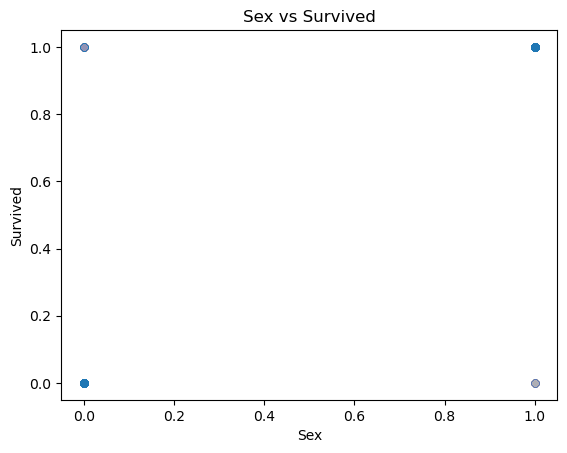

In [17]:
# Plot Sex vs Survived to see how well they correlate
plt.scatter(df_titanic['Sex'], df_titanic['Survived'], alpha=0.005)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Sex vs Survived')

This graph is ridiculous. However, by making the alpha incredibly small, it shows essentially what the bar graph above shows but in a less readable manner: women were more likely to survive, men were more likely to die.

In [18]:
# return the dataframe to its original state
if all((
    df_titanic['Sex'].dtype == np.int64,
    'C' in df_titanic.columns,
    'Q' in df_titanic.columns,
    'S' in df_titanic.columns,
)):
    df_titanic['Sex'] = df_titanic['Sex'].map({0: 'male', 1: 'female'})
    df_titanic = df_titanic.drop(columns=['C', 'Q', 'S'])
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Scaling

In [19]:
# import transformers to scale input features
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import (
    PowerTransformer, QuantileTransformer, RobustScaler, StandardScaler
)

In [20]:
class DoNothingTransformer(BaseEstimator, TransformerMixin):
    """Performs no transformation of the original 
    data, but returns it as numpy array."""

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None) -> np.array:
        return X.to_numpy()

In [21]:
RANDOM_STATE = 42

scalers = {
    'Original Data': DoNothingTransformer(),
    'Robust': RobustScaler(quantile_range=(25, 75)),
    'Power': PowerTransformer(method='yeo-johnson'),
    'Quantile (Gaussian)': QuantileTransformer(
        output_distribution='normal',
        random_state=RANDOM_STATE,
        n_quantiles=df_titanic.shape[0]
),
    'Standard': StandardScaler(),
}

columns = df_titanic.select_dtypes(include='number').columns.drop('Survived')

scaled_features = []
for scaler in scalers.values():
    scaled_features.append(
        scaler.fit_transform(
            df_titanic.loc[:, columns]
        )
    )

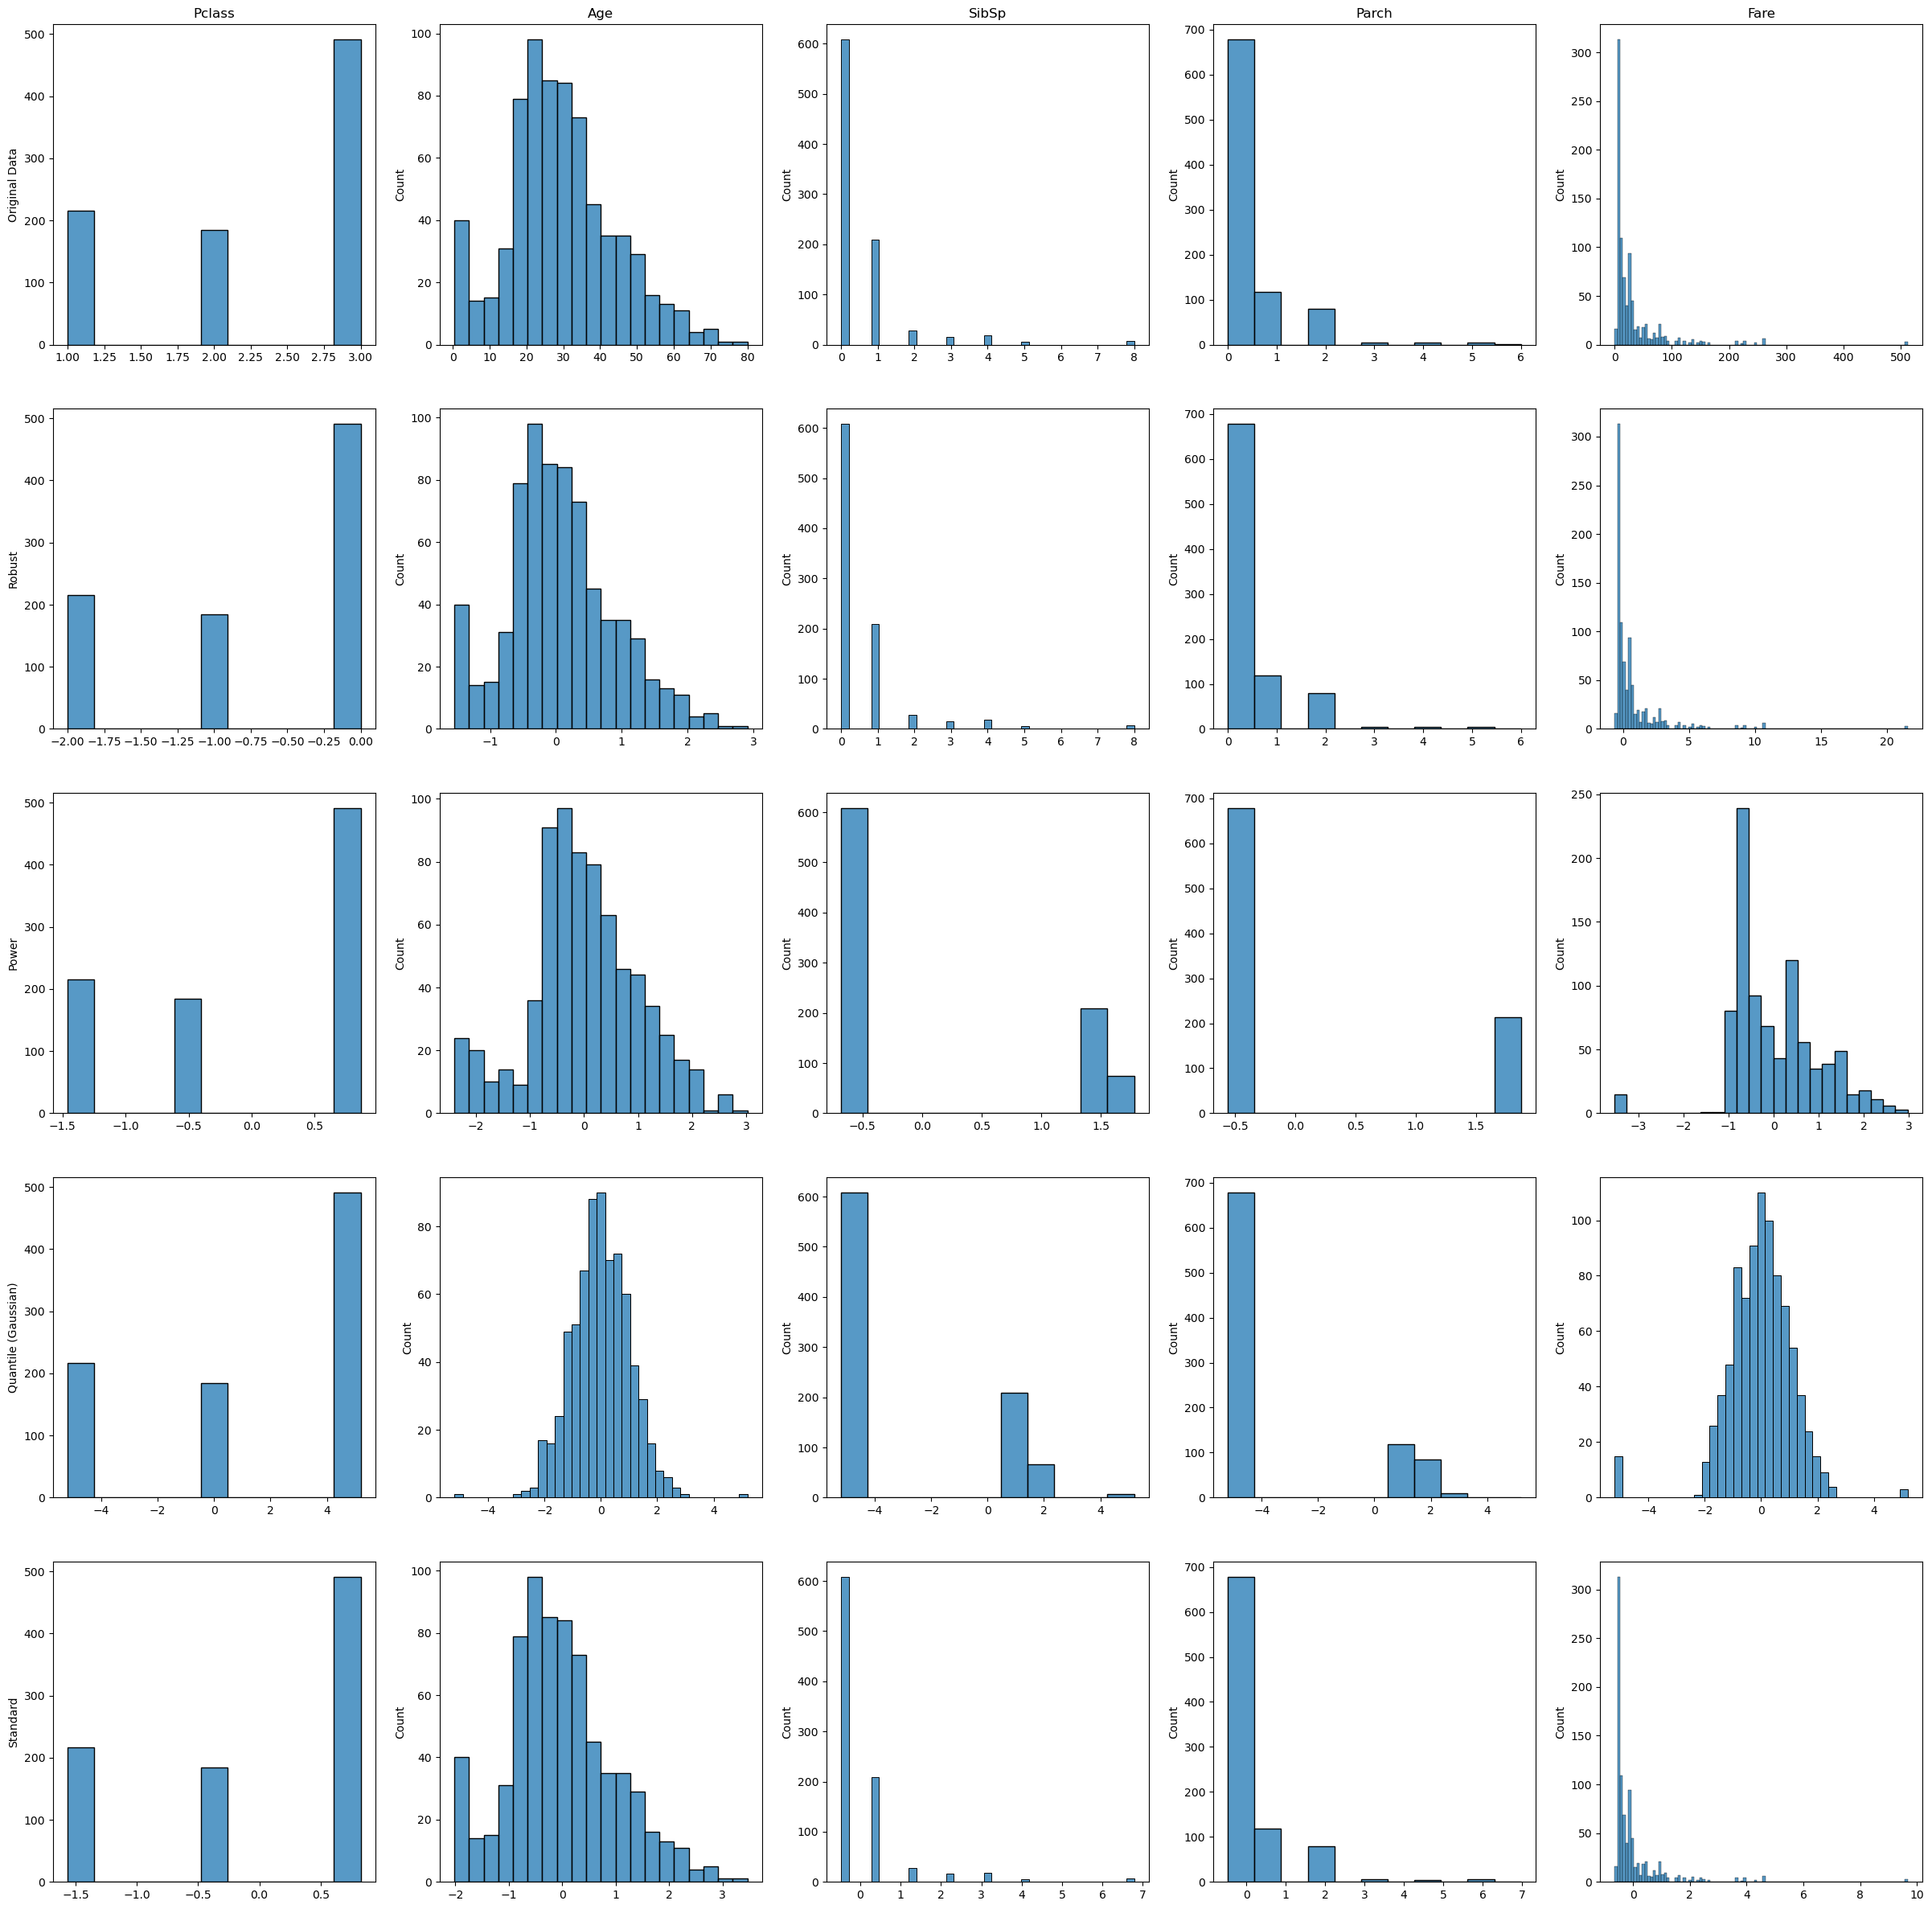

In [22]:
num_rows = len(scalers)
num_cols = len(columns)

fig, axs = plt.subplots(num_rows, num_cols)
fig.set_figwidth(30)
fig.set_figheight(30)

for r, scaler in enumerate(scalers.keys()):
    axs[r, 0].set_ylabel(scaler)

for c, title in enumerate(columns):
    axs[0, c].set_title(title)

for i, ax in enumerate(axs.flatten()):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(scaled_features[row][:, col], ax=ax)

The graphs show that:
1. Pclass
   1. Quantile Transformer centers the class to a mean of 0, but range is -5 to 5.
   2. RobustScaler scales the values such that they are all negative. Which may not be good.
   3. The other two scalers scale from about -1.5 to 1 with a mean around -0.5.
2. Age
   1. Age is somewhat binomially distributed (with peaks at ages < 5 and early 20s) so the QuantileTransformer produces a nice normal distribution
   2. The other scalers do remove the bias (set mean to 0) with a range of -2 to 3, without really changing the shape of the distribution
3. SibSp & ParCh
   1. It doesn't look like any of the transformers scale either of these feature in a useful way - more investigation needed
4. Fare
   1. Quantile transformer appears best for this.